In [ ]:
!pip install anvil-uplink

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect("server_HY5LXYU4CT55Q7RWFCGTODZV-PW3FAWZMWJJWCTDA")

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/Burung.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import os
import random
import shutil

# Path direktori
base_dir = "/content/Burung"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

# Persentase data yang disalin ke validasi
valid_split = 0.4

# Untuk setiap kelas di folder train
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    class_valid_path = os.path.join(valid_dir, class_name)

    if not os.path.isdir(class_train_path):
        continue

    # Buat folder validasi per kelas jika belum ada
    os.makedirs(class_valid_path, exist_ok=True)

    # Ambil semua file gambar dalam kelas
    all_images = os.listdir(class_train_path)
    random.shuffle(all_images)

    # Hitung jumlah yang akan disalin
    n_valid = int(len(all_images) * valid_split)
    valid_images = all_images[:n_valid]

    # Salin gambar ke folder valid
    for img_name in valid_images:
        src = os.path.join(class_train_path, img_name)
        dst = os.path.join(class_valid_path, img_name)
        shutil.copy2(src, dst)  # copy2 menjaga metadata file (tanggal, dll)

    print(f"Menyalin {n_valid} gambar dari '{class_name}' ke folder validasi.")

print("Penyalinan selesai ✅")

Menyalin 63 gambar dari 'AMERICAN COOT' ke folder validasi.
Menyalin 72 gambar dari 'ABBOTTS BOOBY' ke folder validasi.
Menyalin 62 gambar dari 'AFRICAN OYSTER CATCHER' ke folder validasi.
Menyalin 71 gambar dari 'AMERICAN AVOCET' ke folder validasi.
Menyalin 66 gambar dari 'ALPINE CHOUGH' ke folder validasi.
Menyalin 66 gambar dari 'ABBOTTS BABBLER' ke folder validasi.
Menyalin 54 gambar dari 'AFRICAN CROWNED CRANE' ke folder validasi.
Menyalin 64 gambar dari 'ALBERTS TOWHEE' ke folder validasi.
Menyalin 54 gambar dari 'AFRICAN FIREFINCH' ke folder validasi.
Menyalin 53 gambar dari 'AMERICAN GOLDFINCH' ke folder validasi.
Menyalin 61 gambar dari 'AFRICAN EMERALD CUCKOO' ke folder validasi.
Menyalin 65 gambar dari 'AMERICAN FLAMINGO' ke folder validasi.
Menyalin 71 gambar dari 'AFRICAN PYGMY GOOSE' ke folder validasi.
Menyalin 53 gambar dari 'ALBATROSS' ke folder validasi.
Menyalin 66 gambar dari 'ALEXANDRINE PARAKEET' ke folder validasi.
Menyalin 60 gambar dari 'ALTAMIRA YELLOWTHROAT'

Label kelas: ['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL']
Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.1636 - loss: 2.5732 - val_accuracy: 0.0031 - val_loss: 12.0783
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4602 - loss: 1.5445 - val_accuracy: 0.0021 - val_loss: 16.3812
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6214 - loss: 1.1039 - val_accuracy: 0.0031 - val_loss: 13.6345
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7562 - loss: 0.7623 - val_accuracy: 0.0031 - val_loss: 17.7933
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms

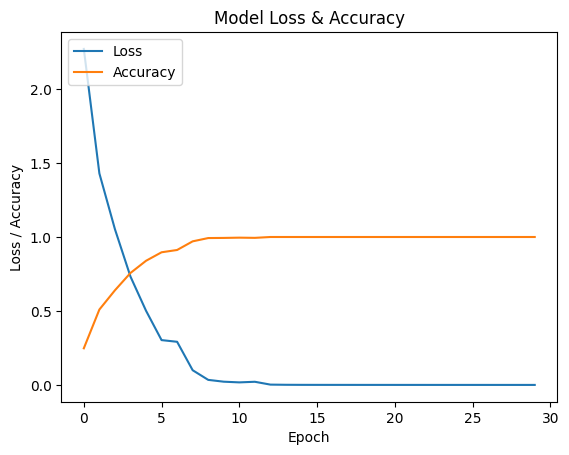

In [ ]:
# 1. IMPORT LIBRARY
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the path where the zip file was extracted
# Based on previous code, the zip file was extracted to /content/ and created a 'Burung' folder
extract_path = "/content/Burung"
path_train = os.path.join(extract_path, "train") # Correctly define path_train

# 3. BACA LABEL KELAS secara otomatis
LabelKelas = sorted([d for d in os.listdir(path_train) if os.path.isdir(os.path.join(path_train, d))])
print("Label kelas:", LabelKelas)

# 4. FUNGSI LOAD DATASET
def LoadCitraTraining(sDir, LabelKelas):
    JumlahKelas = len(LabelKelas)
    TargetKelas = np.eye(JumlahKelas)
    X, T = [], []

    for i, label in enumerate(LabelKelas):
        DirKelas = os.path.join(sDir, label)
        files = os.listdir(DirKelas)

        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(DirKelas, f)
                img = np.double(cv2.imread(path, 1))
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
                img = img.astype('float32')
                X.append(img)
                T.append(TargetKelas[i])

    X = np.array(X).astype('float32')
    T = np.array(T).astype('float32')
    return X, T

# 5. FUNGSI MODEL CNN
def ModelDeepLearningCNN(JumlahKelas):
    input_img = Input(shape=(128, 128, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(JumlahKelas, activation='softmax')(x)

    model = Model(input_img, x)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 6. FUNGSI TRAINING
def TrainingCNN(JumlahEpoh, DirektoriDataSet, LabelKelas, NamaFileBobot='model_burung.h5'):
    X, D = LoadCitraTraining(DirektoriDataSet, LabelKelas)
    model = ModelDeepLearningCNN(len(LabelKelas))
    history = model.fit(X, D, epochs=JumlahEpoh, shuffle=True, validation_split=0.3)
    model.save(NamaFileBobot)
    return model, history

# 7. PARAMETER TRAINING
JumlahEpoh = 30
FileBobot = "model_burung.h5"
# Pass path_train instead of extract_path
ModelCNN, history = TrainingCNN(JumlahEpoh, path_train, LabelKelas, FileBobot)

# 8. GRAFIK AKURASI & LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss & Accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

anvil.server.connect("server_NOGXYZB66UGV6G2V6B4XFDIG-LPIJDTRSJ4NRVAZI")

model = load_model("model_burung.h5")

def klasifikasi_gambar(image_path, model, LabelKelas):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred.max() > 0.5:
        idx = np.argmax(pred)
        return LabelKelas[idx]
    return "Tidak diketahui"

@anvil.server.callable
def predict_from_upload(file):
    # Simpan file ke disk
    with open("temp.jpg", "wb") as f:
        f.write(file.get_bytes())

    # Baca gambar, proses, prediksi
    img = cv2.imread("temp.jpg")
    img = cv2.resize(img, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    # Prediksi dengan model
    pred = ModelCNN.predict(img)

    if pred.max() > 0.5:
        idx = np.argmax(pred)
        return LabelKelas[idx]  # Ini adalah nama burung
    else:
        return "Tidak dikenali"

try:
    anvil.server.wait_forever()
except KeyboardInterrupt:
    print("Server dihentikan.")

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')


Connecting to wss://anvil.works/uplink
Anvil websocket open
Fatal error from Anvil server: Incorrect uplink key
Anvil websocket closed (code 1000, reason=b'')
Server dihentikan.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
